In [1]:
import numpy as np
import pandas as pd
% matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def fake_data():
    mat = np.ones((20,40))
    for x in range(40):
        mat[:, x] *= np.linspace(0, np.random.randint(15,30), 20)
    df = pd.DataFrame(mat)
    return df

In [3]:
def closest(df, val, col):
    under = df[col+1].where(df[col+1] <= val).max()
    over = df[col+1].where(df[col+1] > val).min()

    if val-under < over-val:
        return under
    else:
        return over

In [4]:
def interp(df, val, col):
    one = closest(df, val, col)
    two = closest(df, one, col+1)
    point = np.mean([val, one, two])
    
    return point

In [5]:
def create_mpoints(df):
    mids = df.apply(lambda a: a + a[1]/2)

    for col in range(len(mids.columns)-2):
        for row in range(len(mids)):
            mid = mids[col][row]
            new = interp(mids, mid, col)
            mids.set_value(row, col, new)
    
    return mids

In [6]:
def create_lines(mpts):
    lines = pd.DataFrame(mpts[0])

    for col in range(1, len(mpts.columns)):
        for row in range(len(mpts)):
            prev = lines[col-1][row]
            val = closest(mpts, prev, col-1)
            lines.set_value(row, col, val)

    lines = lines.dropna()
    return lines

In [7]:
def cplot(df, mids, lines):
    for i in range(40):
        plt.plot(np.ones(20)*i, df[i], 'k.')
        plt.plot(np.ones(20)*i, mids[i], 'r.')
    for j in range(len(lines)):
        plt.plot(range(len(lines.columns)), lines.iloc[j])

In [8]:
eclipses = fake_data()

<IPython.core.display.Javascript object>


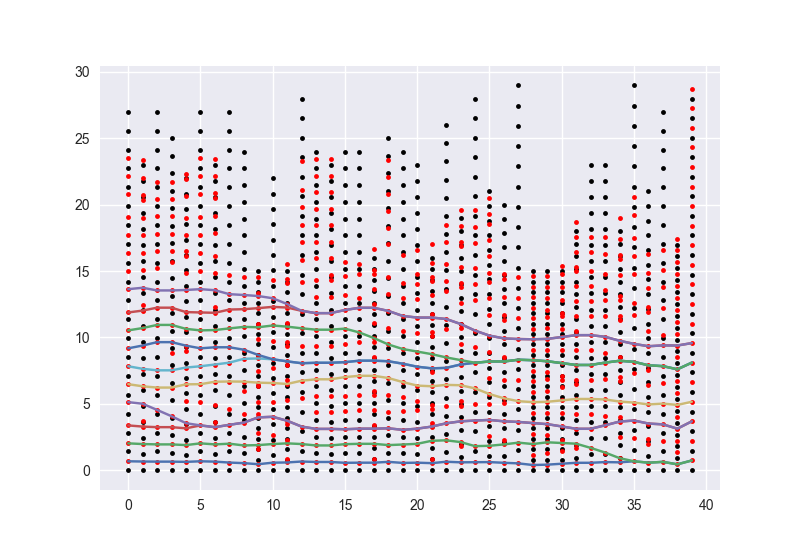

In [9]:
mpoints = create_mpoints(eclipses)
lines = create_lines(mpoints)
cplot(eclipses, mpoints, lines)